In [1]:
import sys
sys.path.insert(0, r'../../../quetzal')

import pandas as pd
from quetzal.model import stepmodel, model
%matplotlib inline

PyTables is not installed. No support for HDF output.


In [2]:
training_folder = '../../'

In [3]:
sm = stepmodel.read_zippedpickles(training_folder + 'models/base/walk_model')

zone_to_transit: 100%|██████████| 29/29 [00:00<00:00, 31.41it/s]


In [4]:
road = stepmodel.read_json(training_folder  + 'inputs/road_all_drive')

In [5]:
import geopandas as gpd
sm.road_links = gpd.GeoDataFrame(road.road_links).set_crs(epsg=4326).to_crs(epsg=3857)
sm.road_nodes = gpd.GeoDataFrame(road.road_nodes).set_crs(epsg=4326).to_crs(epsg=3857)

In [6]:
sandbox = stepmodel.read_zippedpickles(training_folder + 'models/preparation/sandbox')
sandbox = sandbox.change_epsg(epsg=3857, coordinates_unit='meter')
sm.links = sandbox.links
sm.nodes = sandbox.nodes

Reprojecting model from epsg 2154 to epsg 3857: 100%|██████████| 8/8 [00:00<00:00, 207.53it/s]


<AxesSubplot: >

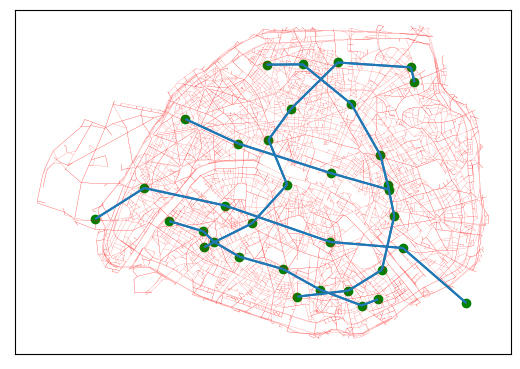

In [7]:
sm.plot('links', ax=sm.plot('nodes', color='green', ax=sm.plot('road_links', color='red', linewidth=0.1)))

# Networkcaster
à faire sur un réseau propre, avant l'agrégation

In [8]:
sm.integrity_fix_collision()
sm.integrity_fix_sequences()

dropped broken sequences: []


In [9]:
sm.integrity_test_all(errors='ignore', verbose=True)

passed: integrity_test_circular_lines
passed: integrity_test_collision


9714it [00:00, 27789.96it/s]


passed: integrity_test_dead_ends
passed: integrity_test_duplicate_volumes
passed: integrity_test_isolated_roads
passed: integrity_test_nodeset_consistency
passed: integrity_test_road_duplicated_ab_links


9714it [00:01, 7178.43it/s]

passed: integrity_test_road_network
passed: integrity_test_road_nodeset_consistency
passed: integrity_test_sequences
passed: integrity_test_str_collision


In [10]:
sm.preparation_cast_network(
    nearest_method='nodes',
    n_neighbors_centroid=10, 
    n_neighbors=10
)

4_bis: 100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


In [11]:
sm.to_zippedpickles(
    training_folder + 'models/preparation/sandbox_networkcasted'
) 

zone_to_transit: 100%|██████████| 29/29 [00:01<00:00, 18.36it/s]          


In [12]:
sm.analysis_lines()

<AxesSubplot: >

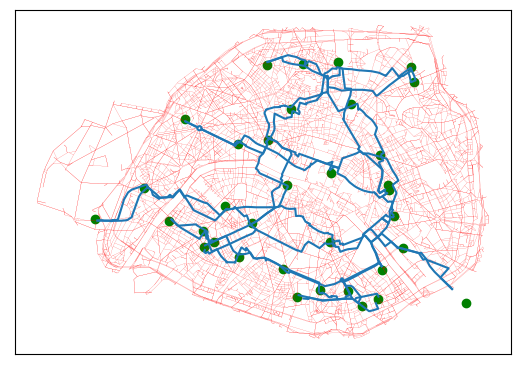

In [13]:
sm.plot('links', ax=sm.plot('nodes', color='green', ax=sm.plot('road_links', color='red', linewidth=0.1)))